# Solution of 5.9.2, Map of Science 
### Read the file `pubmed_results.txt`, and extract all the US ZIP codes.

First, import the modules we'll need.

In [65]:
import re
import csv

Now read the whole file, and store it into a string.

In [66]:
with open("pubmed-spiderveno-set.txt", encoding= "utf8") as f:
    my_text = f.read()

In [67]:
len(my_text)

11817702

Note that the zipcode could be broken over two lines, as in line 43 of `pubmed_results.txt`

```
AD  - Biological and Biomedical Sciences Program, Harvard Medical School, Boston, MA
      02115, USA. Department of Genetics, Harvard Medical School, Boston, MA 02115,
      USA.
```

To avoid problems, replace each newline followed by 6 spaces with a single space.

In [68]:
my_text = re.sub(r'\n\s{6}', ' ', my_text)

We should now have every entry in a single line. Let's look at part of an entry:

In [69]:
print(my_text[:2000])

PMID- 30543821
OWN - NLM
STAT- MEDLINE
DCOM- 20190605
LR  - 20190605
IS  - 1879-3150 (Electronic)
IS  - 0041-0101 (Linking)
VI  - 158
DP  - 2019 Feb
TI  - Versatile spider venom peptides and their medical and agricultural applications.
PG  - 109-126
LID - S0041-0101(18)31019-5 [pii]
LID - 10.1016/j.toxicon.2018.11.298 [doi]
AB  - Spiders have been evolving complex and diverse repertoires of peptides in their  venoms with vast pharmacological activities for more than 300 million years. Spiders  use their venoms for prey capture and defense, hence they contain peptides that  target both prey (mainly arthropods) and predators (other arthropods or  vertebrates). This includes peptides that potently and selectively modulate a range  of targets such as ion channels, receptors and signaling pathways involved in  physiological processes. The contribution of these targets in particular disease  pathophysiologies makes spider venoms a valuable source of peptides with potential  therapeutic use. 

Now write a regular expression that creates a list of zipcodes:

In [70]:
datamex = re.findall(r'[A-Z]{2}\s(\d{5}), USA', my_text)

The anatomy of the regular expression:
```
[A-Z]{2}  -> two capital letters (for the state)
\s -> followed by a space
\d{5} -> followed by exactly 5 digits
, USA -> follwed by the string ", USA"
```
Note that we use a group `(\d{5})` to capture exclusively the zipcode proper.

In [71]:
len(datamex)

259

In [72]:
zipcodes[:10]

['97219',
 '14853',
 '14853',
 '03824',
 '97219',
 '97219',
 '20892',
 '14214',
 '90095',
 '97219']

Extract the unique zipcodes 

In [73]:
unique_zipcodes = list(set(zipcodes))

In [74]:
unique_zipcodes.sort()

In [75]:
unique_zipcodes[:10]

['01545',
 '01655',
 '01854',
 '02114',
 '02115',
 '02129',
 '02142',
 '02543',
 '03824',
 '05405']

In [76]:
len(unique_zipcodes)

104

Now create a dictionary with the latitude and longitude for each zipcode:

In [77]:
zip_coordinates = {}
with open('../data/MapOfScience/zipcodes_coordinates.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        zip_coordinates[row['ZIP']] = [float(row['LAT']), 
                                       float(row['LNG'])]

### Create the lists `zip_code`, containing the ZIP codes, `zip_long`, `zip_lat`, and `zip_count`, containing the unique ZIP codes, their longitude, latitude, and count (number of occurrences in Science), respectively.

In [78]:
zip_code = []
zip_long = []
zip_lat = []
zip_count = []

Populate the lists:

In [79]:
for code in unique_zipcodes:
    # if we can find the coordinates
    if code in zip_coordinates.keys():
        zip_code.append(code)
        zip_lat.append(zip_coordinates[code][0])
        zip_long.append(zip_coordinates[code][1])
        zip_count.append(zipcodes.count(code))

### Plot the results using the following code:

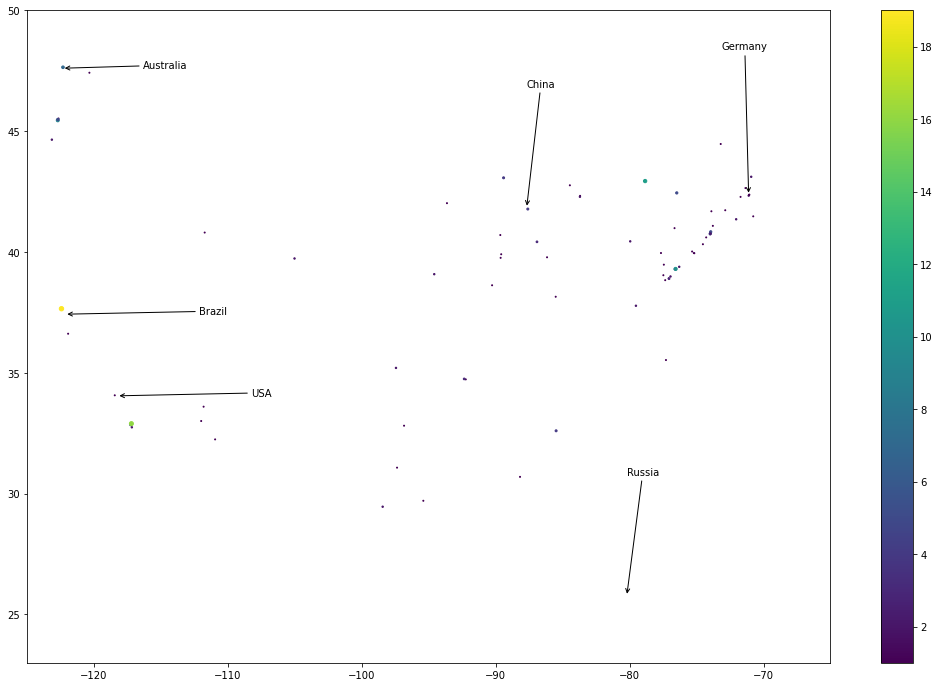

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()
# only continental us without Alaska
plt.xlim(-125,-65)
plt.ylim(23, 50)
# add a few cities for reference (optional)
ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-118.25, 34.05), 
               xytext = (-108.25, 34.05), arrowprops = ard)
plt.annotate('Brazil', xy = (-122.1381, 37.4292), 
               xytext = (-112.1381, 37.4292), arrowprops= ard)
plt.annotate('Germany', xy = (-71.1106, 42.3736), 
               xytext = (-73.1106, 48.3736), arrowprops= ard)
plt.annotate('China', xy = (-87.6847, 41.8369), 
               xytext = (-87.6847, 46.8369), arrowprops= ard)
plt.annotate('Australia', xy = (-122.33, 47.61), 
               xytext = (-116.33, 47.61), arrowprops= ard)
plt.annotate('Russia', xy = (-80.21, 25.7753), 
               xytext = (-80.21, 30.7753), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()

In [ ]:
zip_code.index('60637')

In [ ]:
zip_count[215]